In [93]:
import os

path, dirs, files = next(os.walk('train'))

print("There is")
print(len(files))
print("files")

There is
25000
files


In [94]:
file_names = os.listdir('train')
print(file_names[9])

dog.5535.jpg


In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

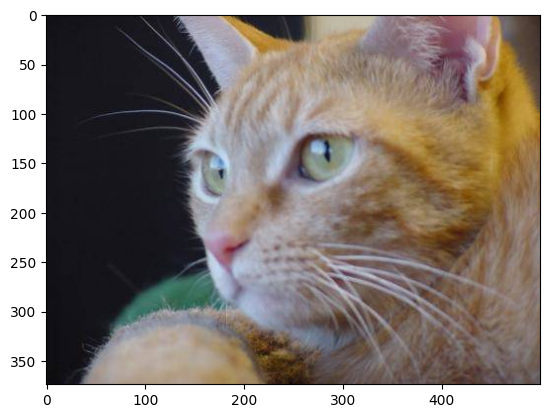

In [96]:
cat = mping.imread('train/cat.1044.jpg')
plt.imshow(cat)
plt.show()

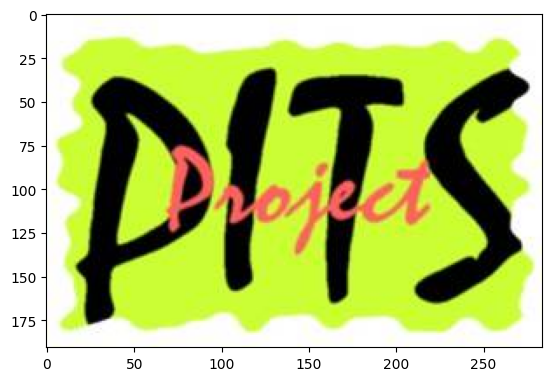

In [97]:
dog = mping.imread('train/dog.10237.jpg')
plt.imshow(dog)
plt.show()

In [98]:
cat_files = []
dog_files = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)
    elif file_name.startswith('dog'):
        dog_files.append(file_name)

print(len(cat_files))
print(len(dog_files))

12500
12500


In [99]:
import PIL

for file_name in file_names:
    img = PIL.Image.open('train/' + file_name)
    img = img.resize((224,224))
    img = img.convert('RGB')

    img.save('resized/' + file_name)